In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
df = pd.read_csv('C:/Users/Mehedi Hassan Galib/Desktop/Python/datas/slump_test.csv')
df.rename(columns = {'Fly ash' : 'Fly_ash', 'Compressive Strength (28-day)(Mpa)' : 'com_strength'}, inplace = True)

In [12]:
df.head()

,No,Cement,Slag,Fly_ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),com_strength
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [31]:
X = pd.DataFrame(df[['Cement','Slag','Fly_ash','Water']])
y = pd.DataFrame(df[['com_strength']])
X1 = pd.DataFrame(df[['Cement','Slag','Fly_ash']])
y1 = pd.DataFrame(df[['com_strength']])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

## Without VIF

In [33]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [16]:
y_pred = lm.predict(X_test)

In [19]:
lm.score(X_test, y_test).round(4)

0.9075

In [37]:
def calc_vif(f1):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(X_train)

,variables,VIF
0,Cement,13.551085
1,Slag,3.203146
2,Fly_ash,4.985673
3,Water,30.588987


In [38]:
df1 = pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ['Cement','Slag','Fly_ash','water','actual_mark','predicted_mark'])
df1

,Cement,Slag,Fly_ash,water,actual_mark,predicted_mark
0,321.0,0.0,164.0,190.0,45.82,44.789811
1,166.0,0.0,260.0,183.0,40.34,38.351513
2,299.0,107.0,0.0,210.0,28.29,29.600695
3,287.0,94.0,121.0,188.0,43.01,40.582684
4,160.0,146.0,188.0,203.0,33.51,34.012534
5,145.0,177.0,227.0,209.0,35.66,36.339389
6,155.4,122.1,240.0,179.9,35.52,39.438633
7,318.0,126.0,0.0,210.0,31.77,32.065364
8,145.0,106.0,136.0,208.0,26.02,26.311846
9,273.0,82.0,105.0,210.0,34.99,35.491064


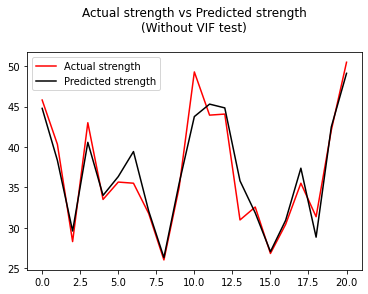

In [39]:
plt.plot(df1.actual_mark, color = 'red', label = "Actual strength")
plt.plot(df1.predicted_mark, color = 'black', label = "Predicted strength")
plt.legend()
plt.title("Actual strength vs Predicted strength\n(Without VIF test)\n")
plt.show()

<br/>
<br/>

# With VIF

In [40]:
lm1 = LinearRegression()
model1 = lm1.fit(X1_train, y1_train)

In [41]:
y1_pred = lm1.predict(X1_test)

In [42]:
lm1.score(X1_test, y1_test).round(4)

0.8056

In [44]:
def calc_vif(f2):
    vif = pd.DataFrame()
    vif["variables"] = X1.columns
    vif["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
    return(vif)

calc_vif(X1_train)

,variables,VIF
0,Cement,2.933518
1,Slag,2.008323
2,Fly_ash,2.287793


In [46]:
df2 = pd.DataFrame(np.c_[X1_test, y1_test, y1_pred], columns = ['Cement','Slag','Fly_ash','actual_mark','predicted_mark'])
df2

,Cement,Slag,Fly_ash,actual_mark,predicted_mark
0,321.0,0.0,164.0,45.82,43.861277
1,166.0,0.0,260.0,40.34,37.513868
2,299.0,107.0,0.0,28.29,30.033678
3,287.0,94.0,121.0,43.01,39.719751
4,160.0,146.0,188.0,33.51,35.223008
5,145.0,177.0,227.0,35.66,38.458594
6,155.4,122.1,240.0,35.52,38.808604
7,318.0,126.0,0.0,31.77,32.568630
8,145.0,106.0,136.0,26.02,27.493336
9,273.0,82.0,105.0,34.99,36.423852


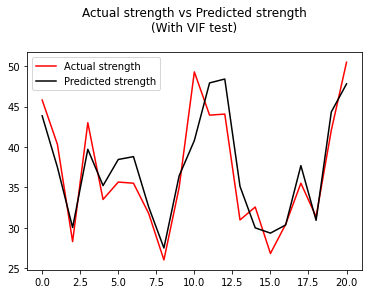

In [48]:
plt.plot(df2.actual_mark, color = 'red', label = "Actual strength")
plt.plot(df2.predicted_mark, color = 'black', label = "Predicted strength")
plt.legend()
plt.title("Actual strength vs Predicted strength\n(With VIF test)\n")
plt.show()